# Model Training

## 1.1 Import Data and Requirements Packages

In [1]:
# Basic Import 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modeling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV 
# from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


### Import the CSV sa Pandas dataframe

In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Preparing X and Y variables

In [4]:
X=df.drop(columns=['math_score'], axis=1)
y= df['math_score']


In [5]:
# Create Column transformer with 3 types of transformers
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', oh_transformer, cat_features),
        ('StandardScaler', numeric_transformer, num_features),
    ]
)

In [6]:
X = preprocessor.fit_transform(X)

In [7]:
# Separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
X_train.shape, X_test.shape

((800, 19), (200, 19))

### Create and evaluate Funcion to give all the metrics after model Training

In [8]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [10]:
models = {
    'Linear regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'K-Neighbors Regressor': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'XGB Regressor': XGBRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor(),
}

model_list = []
r2_list = []
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # Making predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_train_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('model performance for Training set')
    print('- Root Mean Squared Error: {:.4f}'.format(model_train_rmse))
    print('- Mean Absolute Error: {:.4f}'.format(model_train_mae))
    print('- R2 Score: {:.4f}'.format(model_train_r2))

    print('---------------------------------------')

    print('Model performance for test set')

    print('- Root Mean Squared Error: {:.4f}'.format(model_test_rmse))
    print('- Mean Absolute Error: {:.4f}'.format(model_test_mae))
    print('- R2 Score: {:.4f}'.format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')



Linear regression
model performance for Training set
- Root Mean Squared Error: 5.2783
- Mean Absolute Error: 4.1876
- R2 Score: 0.8777
---------------------------------------
Model performance for test set
- Root Mean Squared Error: 5.5292
- Mean Absolute Error: 4.4879
- R2 Score: 0.8711


Lasso
model performance for Training set
- Root Mean Squared Error: 6.5440
- Mean Absolute Error: 5.1264
- R2 Score: 0.8120
---------------------------------------
Model performance for test set
- Root Mean Squared Error: 6.8277
- Mean Absolute Error: 5.5522
- R2 Score: 0.8034


Ridge
model performance for Training set
- Root Mean Squared Error: 5.2785
- Mean Absolute Error: 4.1867
- R2 Score: 0.8777
---------------------------------------
Model performance for test set
- Root Mean Squared Error: 5.5306
- Mean Absolute Error: 4.4867
- R2 Score: 0.8710


K-Neighbors Regressor
model performance for Training set
- Root Mean Squared Error: 5.7683
- Mean Absolute Error: 4.5278
- R2 Score: 0.8539
--------

### Results

In [11]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model', 'R2 Score']).sort_values(by='R2 Score', ascending=False)

,Model,R2 Score
0,Linear regression,0.871089
2,Ridge,0.871025
5,Random Forest Regressor,0.841855
7,AdaBoost Regressor,0.825698
6,XGB Regressor,0.811493
1,Lasso,0.803429
3,K-Neighbors Regressor,0.794274
4,Decision Tree,0.706390


### Linear Regression

In [12]:
lin_model = LinearRegression()
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print('Accuracy of the model is %.2f'%score)

Accuracy of the model is 87.11


### plot y_pred and y_test

Text(0, 0.5, 'Predito')

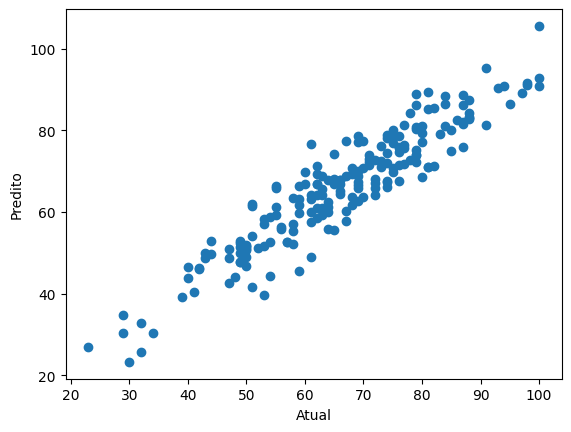

In [13]:
plt.scatter(y_test, y_pred)
plt.xlabel('Atual')
plt.ylabel('Predito')

<Axes: xlabel='math_score'>

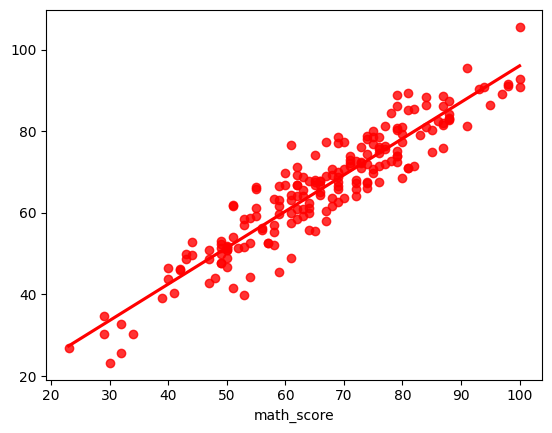

In [14]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')

### Difference between Actual and Predicted values

In [15]:
pred_df = pd.DataFrame({'Actual Value': y_test, 
                        'Predicted Value': y_pred, 
                        'Difference': y_test - y_pred})
pred_df

,Actual Value,Predicted Value,Difference
131,53,39.736027,13.263973
354,59,63.162628,-4.162628
982,79,88.911910,-9.911910
476,76,71.514747,4.485253
491,64,61.131744,2.868256
...,...,...,...
819,77,81.199080,-4.199080
0,72,65.831518,6.168482
710,93,90.429863,2.570137
889,44,52.940131,-8.940131
